In [1]:
import pandas as pd

In [2]:
geyser = pd.read_csv("data/faithful.csv")

In [3]:
geyser.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  272 non-null    int64  
 1   eruptions   272 non-null    float64
 2   waiting     272 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 6.5 KB


In [4]:
geyser.head()

,Unnamed: 0,eruptions,waiting
0,1,3.600,79
1,2,1.800,54
2,3,3.333,74
3,4,2.283,62
4,5,4.533,85


In [5]:
# drop the initial index
geyser = geyser.drop(geyser.columns[0], axis = 1)
# rename columns
geyser.columns = ['erutpion_duration', 'waiting_duration']
geyser.head()

,erutpion_duration,waiting_duration
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


In [6]:
# Import matplotlib
import matplotlib.pyplot as plt
# enable inline plots
%matplotlib inline

array([[<AxesSubplot:title={'center':'erutpion_duration'}>,
        <AxesSubplot:title={'center':'waiting_duration'}>]], dtype=object)

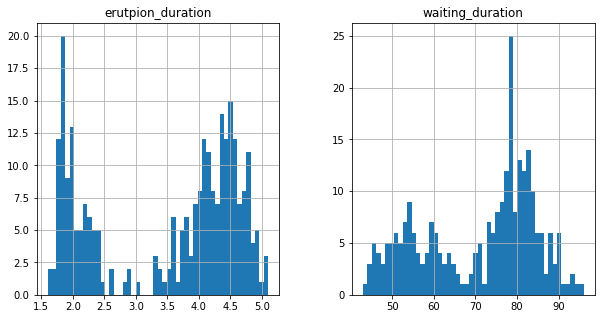

In [7]:
# plot the geysey data
#plt.hist(geyser, bins=50, figsize=(10,5))
geyser.hist(bins=50, figsize=(10,5))

Text(0.5, 1.0, 'Feture space - Geyser Dataset')

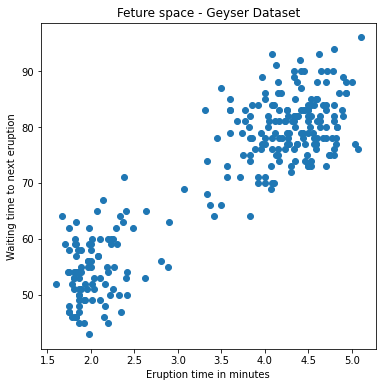

In [8]:
# plot eruption time v wait time as scatter
plt.figure(figsize = (6,6))
plt.scatter(geyser.iloc[:,0],
           geyser.iloc[:,1])
# add labels
plt.xlabel('Eruption time in minutes')
plt.ylabel('Waiting time to next eruption')
plt.title('Feture space - Geyser Dataset')

In [9]:
# import standard sklearn
from sklearn.preprocessing import StandardScaler as ss
geyser_scaled = ss().fit_transform(geyser)
geyser_scaled = pd.DataFrame(geyser_scaled, columns = ['eruption_duration', 'waiting_duration'])
geyser_scaled.head()

,eruption_duration,waiting_duration
0,0.098499,0.597123
1,-1.481459,-1.245181
2,-0.135861,0.228663
3,-1.057503,-0.655644
4,0.917443,1.039277


In [10]:
# import KMeans from sklearn
from sklearn.cluster import KMeans

In [11]:
# slice the data for pre
geyser_initial = geyser.iloc[0:259, :]
geyser_scaled_initial = geyser_scaled.iloc[0:259, :]

In [12]:
# slice the data for post
geyser_later = geyser.iloc[260:273, :]
geyser_scaled_later = geyser_scaled.iloc[260:273, :]

In [13]:
# create a KMeans with 2 clusters | From .fit() this can now train 
km_1 = KMeans(n_clusters = 2, max_iter = 20, verbose = 1).fit(geyser_initial)

Initialization complete
Iteration 0, inertia 9908.410865999997
Iteration 1, inertia 8400.294580819516
Iteration 2, inertia 8376.791060111938
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 13111.227351999989
Iteration 1, inertia 8492.530175421593
Iteration 2, inertia 8379.492945057826
Iteration 3, inertia 8376.791060111938
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 21284.489975999986
Iteration 1, inertia 9717.385328895814
Iteration 2, inertia 8492.530175421593
Iteration 3, inertia 8379.492945057826
Iteration 4, inertia 8376.791060111938
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 11285.628797000005
Iteration 1, inertia 8716.8579596321
Iteration 2, inertia 8379.492945057826
Iteration 3, inertia 8376.791060111938
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 24764.912431999994
Iteration 1, inertia 8785.06831

In [14]:
# look at the 2 dimensional cluster
km_1.cluster_centers_ 

array([[ 2.09876842, 54.96842105],
       [ 4.29060976, 80.27439024]])

In [15]:
# look at the labels
km_1.labels_

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0])

In [16]:
km_1.inertia_

8376.791060111938

In [17]:
# create a cluster with the scaled data
km_1_ss = KMeans(n_clusters = 2, max_iter = 20, verbose = 1).fit(geyser_scaled_initial)

Initialization complete
Iteration 0, inertia 108.48403812994805
Iteration 1, inertia 76.52341276829553
Iteration 2, inertia 76.23523060583942
Iteration 3, inertia 76.20433662586004
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 201.79461594684767
Iteration 1, inertia 76.72352573741462
Iteration 2, inertia 76.27356816192416
Iteration 3, inertia 76.23523060583942
Iteration 4, inertia 76.20433662586004
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 317.74878314512785
Iteration 1, inertia 91.11965432175734
Iteration 2, inertia 76.72352573741462
Iteration 3, inertia 76.27356816192416
Iteration 4, inertia 76.23523060583942
Iteration 5, inertia 76.20433662586004
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia 139.0969956189509
Iteration 1, inertia 77.23829645889016
Iteration 2, inertia 76.27356816192416
Iteration 3, inertia 76.23523060583942
Iteration 4, inertia 7

In [18]:
# look at cluster centers
km_1_ss.cluster_centers_

array([[ 0.70328731,  0.67525491],
       [-1.25809373, -1.185752  ]])

In [19]:
# look at the labels
km_1_ss.labels_ # distribution 

array([0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

Text(0.5, 1.0, 'Clusters in geyser Dataset')

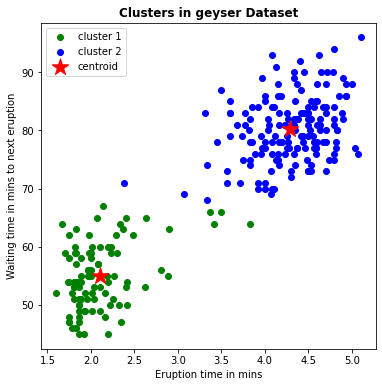

In [20]:
# plot the clusters
# set fig size
fig, ax = plt.subplots(figsize = (6,6))
# first cluster
plt.scatter(x = geyser_initial.iloc[geyser_initial.index[km_1.labels_ == 0].tolist(), [0]],
           y = geyser_initial.iloc[geyser_initial.index[km_1.labels_ == 0].tolist(), [1]],
           c = 'green',
           label = 'cluster 1')

# second cluster
plt.scatter(x = geyser_initial.iloc[geyser_initial.index[km_1.labels_ == 1].tolist(), [0]],
           y = geyser_initial.iloc[geyser_initial.index[km_1.labels_ == 1].tolist(), [1]],
           c = 'blue',
           label = 'cluster 2')

# highlight the centroids
plt.scatter(x = km_1.cluster_centers_[:,[0]],
           y = km_1.cluster_centers_[:,[1]],
           marker = '*', s = 300, label = 'centroid', c = 'r')

plt.legend()
plt.xlabel('Eruption time in mins')
plt.ylabel('Waiting time in mins to next eruption')
plt.title('Clusters in geyser Dataset', fontweight = 'bold')

Text(0.5, 1.0, 'Clusters in geyser Dataset scaled')

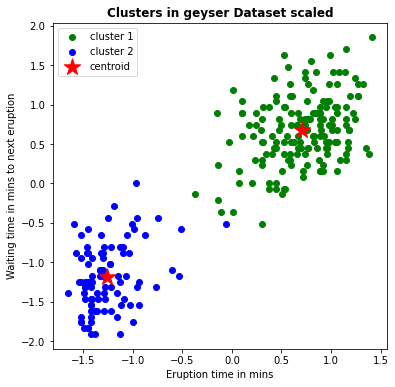

In [21]:
# Now plot this for the standard dataset

# plot the clusters
# set fig size
fig, ax = plt.subplots(figsize = (6,6))
# first cluster
plt.scatter(x = geyser_scaled_initial.iloc[geyser_scaled_initial.index[km_1_ss.labels_ == 0].tolist(), [0]],
           y = geyser_scaled_initial.iloc[geyser_scaled_initial.index[km_1_ss.labels_ == 0].tolist(), [1]],
           c = 'green',
           label = 'cluster 1')

# second cluster
plt.scatter(x = geyser_scaled_initial.iloc[geyser_initial.index[km_1_ss.labels_ == 1].tolist(), [0]],
           y = geyser_scaled_initial.iloc[geyser_initial.index[km_1_ss.labels_ == 1].tolist(), [1]],
           c = 'blue',
           label = 'cluster 2')

# highlight the centroids
plt.scatter(x = km_1_ss.cluster_centers_[:,[0]],
           y = km_1_ss.cluster_centers_[:,[1]],
           marker = '*', s = 300, label = 'centroid', c = 'r')

plt.legend()
plt.xlabel('Eruption time in mins')
plt.ylabel('Waiting time in mins to next eruption')
plt.title('Clusters in geyser Dataset scaled', fontweight = 'bold')

In [22]:
# make same with k=3
# create a KMeans with 3 clusters | From .fit() this can now train 
km_2 = KMeans(n_clusters = 3, max_iter = 20, verbose = 1).fit(geyser_initial)
# create a KMeans with 3 clusters, but scaled
km_2_ss = KMeans(n_clusters = 3, max_iter = 20, verbose = 1).fit(geyser_scaled_initial)

Initialization complete
Iteration 0, inertia 5140.158483000005
Iteration 1, inertia 4858.974367222176
Iteration 2, inertia 4816.339490367572
Iteration 3, inertia 4806.435807684
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 12101.486639000006
Iteration 1, inertia 5226.553876062043
Iteration 2, inertia 5056.732904773686
Iteration 3, inertia 4919.779046078304
Iteration 4, inertia 4842.531304396426
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 6271.476922000003
Iteration 1, inertia 4989.63011475268
Iteration 2, inertia 4919.779046078304
Iteration 3, inertia 4842.531304396426
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 6296.585809000001
Iteration 1, inertia 5552.493211710526
Iteration 2, inertia 5237.350440487244
Iteration 3, inertia 5056.732904773686
Iteration 4, inertia 4919.779046078304
Iteration 5, inertia 4842.531304396426
Converged at iteration 5: st

In [23]:
# make same with k=4
# create a KMeans with 3 clusters | From .fit() this can now train 
km_3 = KMeans(n_clusters = 4, max_iter = 20, verbose = 1).fit(geyser_initial)
# create a KMeans with 3 clusters, but scaled
km_3_ss = KMeans(n_clusters = 4, max_iter = 20, verbose = 1).fit(geyser_scaled_initial)

Initialization complete
Iteration 0, inertia 3503.0945520000005
Iteration 1, inertia 3002.2014725014833
Iteration 2, inertia 2920.693556726144
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 3625.81785
Iteration 1, inertia 3124.4997070315217
Iteration 2, inertia 3038.6442093977407
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 4160.845258999999
Iteration 1, inertia 2919.4276302482535
Iteration 2, inertia 2842.6391031731337
Iteration 3, inertia 2771.039842086994
Iteration 4, inertia 2756.555774599708
Iteration 5, inertia 2750.801211125707
Iteration 6, inertia 2748.685878458903
Converged at iteration 6: strict convergence.
Initialization complete
Iteration 0, inertia 4663.314492
Iteration 1, inertia 3220.7635083666255
Iteration 2, inertia 2968.625298917233
Iteration 3, inertia 2861.7934225630793
Iteration 4, inertia 2811.811452922999
Converged at iteration 4: strict convergence.
Initialization complete

In [24]:
# make same with k=5
# create a KMeans with 3 clusters | From .fit() this can now train 
km_4 = KMeans(n_clusters = 4, max_iter = 20, verbose = 1).fit(geyser_initial)
# create a KMeans with 3 clusters, but scaled
km_4_ss = KMeans(n_clusters = 4, max_iter = 20, verbose = 1).fit(geyser_scaled_initial)

Initialization complete
Iteration 0, inertia 4759.805161999998
Iteration 1, inertia 3346.144829686803
Iteration 2, inertia 3127.608592178467
Iteration 3, inertia 2946.1481212046633
Iteration 4, inertia 2830.8997672259447
Iteration 5, inertia 2793.1703415965308
Iteration 6, inertia 2791.0772829947596
Converged at iteration 6: center shift 0.006245250731972277 within tolerance 0.009109693045696981.
Initialization complete
Iteration 0, inertia 4015.269062999998
Iteration 1, inertia 3841.837988683616
Iteration 2, inertia 3716.302143266739
Iteration 3, inertia 3675.4939041630014
Iteration 4, inertia 3558.327349028127
Iteration 5, inertia 3472.5268392526864
Iteration 6, inertia 3397.4534505110587
Iteration 7, inertia 3321.269299287871
Iteration 8, inertia 3273.661537217367
Converged at iteration 8: strict convergence.
Initialization complete
Iteration 0, inertia 3147.713957999998
Iteration 1, inertia 2914.206047425052
Iteration 2, inertia 2842.6391031731337
Iteration 3, inertia 2771.03984208

In [25]:
# create a list of inirtias of all clusters
inertias = [km_1_ss.inertia_, km_2_ss.inertia_, km_3_ss.inertia_, km_4_ss.inertia_]
clusters = [2,3,4,5]

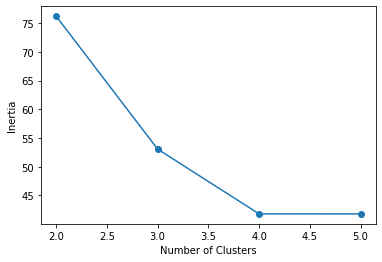

In [26]:
# plot the clusters v inertias
plt.plot(clusters, inertias,
        marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

Text(0.5, 1.0, 'Clusters in geyser Dataset scaled')

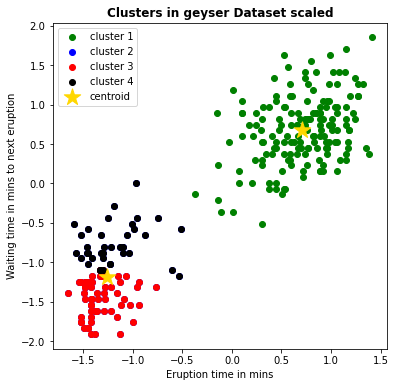

In [27]:
# Now plot this for the standard dataset

# plot the clusters
# set fig size
fig, ax = plt.subplots(figsize = (6,6))
# first cluster
plt.scatter(x = geyser_scaled_initial.iloc[geyser_scaled_initial.index[km_1_ss.labels_ == 0].tolist(), [0]],
           y = geyser_scaled_initial.iloc[geyser_scaled_initial.index[km_1_ss.labels_ == 0].tolist(), [1]],
           c = 'green',
           label = 'cluster 1')

# second cluster
plt.scatter(x = geyser_scaled_initial.iloc[geyser_initial.index[km_2_ss.labels_ == 1].tolist(), [0]],
           y = geyser_scaled_initial.iloc[geyser_initial.index[km_2_ss.labels_ == 1].tolist(), [1]],
           c = 'blue',
           label = 'cluster 2')

# third cluster
plt.scatter(x = geyser_scaled_initial.iloc[geyser_scaled_initial.index[km_3_ss.labels_ == 0].tolist(), [0]],
           y = geyser_scaled_initial.iloc[geyser_scaled_initial.index[km_3_ss.labels_ == 0].tolist(), [1]],
           c = 'red',
           label = 'cluster 3')

# fourth cluster
plt.scatter(x = geyser_scaled_initial.iloc[geyser_initial.index[km_4_ss.labels_ == 1].tolist(), [0]],
           y = geyser_scaled_initial.iloc[geyser_initial.index[km_4_ss.labels_ == 1].tolist(), [1]],
           c = 'black',
           label = 'cluster 4')
# highlight the centroids
plt.scatter(x = km_1_ss.cluster_centers_[:,[0]],
           y = km_1_ss.cluster_centers_[:,[1]],
           marker = '*', s = 300, label = 'centroid', c = 'gold')

plt.legend()
plt.xlabel('Eruption time in mins')
plt.ylabel('Waiting time in mins to next eruption')
plt.title('Clusters in geyser Dataset scaled', fontweight = 'bold')

In [28]:
from matplotlib import cm
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np

In [29]:
# create a new model for 
km_2_ss_sl = KMeans(n_clusters = 3, n_init = 10, max_iter = 20, random_state = 0)
pred_km_2_ss_sl = km_2_ss_sl.fit_predict(geyser_scaled_initial)
# can find the avg score using silhouette_score
silhouette_vals = silhouette_samples(geyser_scaled_initial, pred_km_2_ss_sl, metric = 'euclidean')
silhouette_vals

array([ 0.37646427,  0.81828654,  0.44830146,  0.61947171,  0.56414232,
        0.5225464 ,  0.54792125,  0.02194472,  0.81662274,  0.50330386,
        0.82136003,  0.12425949,  0.22056058,  0.76318746,  0.55105653,
        0.80115174,  0.68061863,  0.55200394,  0.78794479,  0.02208882,
        0.81113237,  0.76318746,  0.39615537,  0.29297049,  0.19266684,
        0.15022271,  0.8186915 ,  0.44996734,  0.41923049,  0.20692772,
        0.40618465, -0.00671657,  0.35871371,  0.15592371,  0.53239677,
        0.81942025,  0.78286595,  0.43263641,  0.75978379,  0.5133258 ,
        0.23481369,  0.78078367,  0.56420757,  0.77123731,  0.23817794,
        0.19432631,  0.41208431,  0.81352474,  0.52404024,  0.75890087,
        0.08391952,  0.51673021,  0.82136003,  0.43263641,  0.80979146,
        0.52067287,  0.51984906,  0.61842454,  0.10343727,  0.30713518,
        0.72195447,  0.5516564 ,  0.77638464,  0.51455591,  0.736316  ,
        0.4509364 ,  0.25426277,  0.28766752,  0.5552814 ,  0.10

In [30]:
silhouette_scores = silhouette_score(geyser_scaled_initial, pred_km_2_ss_sl, metric = 'euclidean')
silhouette_scores

# do the same for 3,4,5 clusters

0.4912037950280445

In [31]:
# find the silhouette plot code from BB later

In [32]:
# !pip install mglearn

In [33]:
from sklearn.datasets import make_moons
import mglearn

In [34]:
# using make_moons create 2 moons
x, y = make_moons(n_samples = 200, noise = 0.05, random_state = 0)

Text(0, 0.5, 'Feature 1')

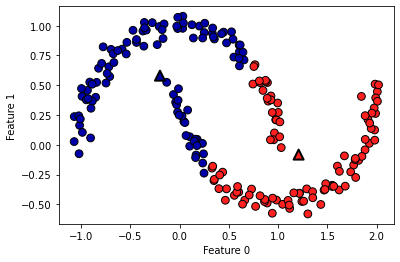

In [35]:
# Find the clusters of the moons
km_c = KMeans(n_clusters = 2)
km_c.fit(x)
y_pred = km_c.predict(x)

plt.scatter(x[:,0], x[:,1], c = y_pred,
           cmap = mglearn.cm2,
           s=60,
           edgecolor = 'k')

plt.scatter(km_c.cluster_centers_[:,0],
           km_c.cluster_centers_[:,1],
           marker = '^',
           c = [mglearn.cm2(0), mglearn.cm2(1)], s = 100, linewidth = 2,
           edgecolor = 'k')

plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

In [36]:
from sklearn.cluster import DBSCAN

In [37]:
dbscan = DBSCAN()
scaler = ss()
scaler.fit(x)
x_scaled = scaler.transform(x)

DBS_cluster = dbscan.fit_predict(x_scaled)

Text(0, 0.5, 'Feature 1')

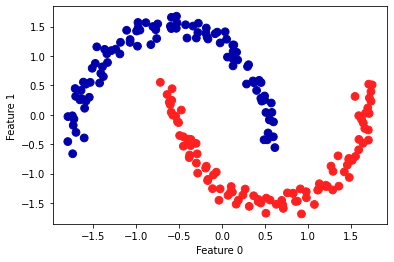